### Logistic Regression

Note that, in spite of its name, logistic regression is a model for classification, not regression.

**Logistic Regression with `penalty` = `l1` and `C` = .1**

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target)
lr1 = LogisticRegression(penalty = 'l1', C = .1)
lr1.fit(Xtrain, ytrain)
ypred = lr1.predict(Xtest)
accuracy_score(ytest, ypred)

0.81578947368421051

In [2]:
lr1.score(Xtest, ytest)

0.81578947368421051

In [2]:
lr1.intercept_

array([ 0.,  0.,  0.])

In [3]:
lr1.coef_

array([[ 0.        ,  0.93828542, -1.17085401,  0.        ],
       [ 0.        , -0.31234161,  0.09268742,  0.        ],
       [-0.74853367,  0.        ,  0.9493398 ,  0.        ]])

**Logistic Regression with `penalty` = `l2` and `C` = .1**


In [4]:
from sklearn import datasets
iris = datasets.load_iris()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target)
lr2 = LogisticRegression(penalty = 'l2', C = .1)
lr2.fit(Xtrain, ytrain)
ypred = lr2.predict(Xtest)
accuracy_score(ytest, ypred)

0.84210526315789469

In [5]:
lr2.intercept_

array([ 0.13062566,  0.06769358, -0.27300159])

In [6]:
lr2.coef_

array([[ 0.1952657 ,  0.66523963, -1.12052191, -0.50421597],
       [-0.04227413, -0.44130401,  0.25612114, -0.14430885],
       [-0.51132025, -0.56195856,  0.83954009,  0.63925853]])

Since we fit the `Logistic Regression` object on a multiclass dataset, it uses the **One-vs-Rest (OvR)** approach by default where the first intercept belongs to the model that fits class 1 vs class 2 and 3; the second value is the intercept of the model that fits class 2 vs class 1 and 3 and so on.

The weight array that we accessed via the `lr.coef_` attribute contains three rows of weight coefficients, one weight vector for each class. Each row consists of 4 weights where each weight is multiplied by the respective feature in the 4 dimensional Iris dataset to calculate the net input:

z = $w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx$

We also notice that for `l1`, the weight vectors are sparse, which means that they only have a few non-zero entries. As a result of L1 regularization, which serves as a method for feature selection, 
we can train a model that is robust to the potentially irrelvant features in this dataset.

**As we can see, all features weights will be zero if we penalize the model with a strong regularization parameter (`C` < .1); `C` is the inverse of the regularization parameter $\lambda$.**

**One vs All (OvR): -**

This is a technique used to extend a binary classifier to multi-class problems. Using OvA, we can train one classifier per class, where the particular class is treated as the positive class and the smaples from all other classes are considered as the negative class. If we were to classify a new data sample, we would use our n classifiers, where n is the number of class labels, and assign the class label with the highest confidence to the particular sample. In the case of the perceptron, we would use OvA to choose the class label that is associated with the largest absolute net input value. 

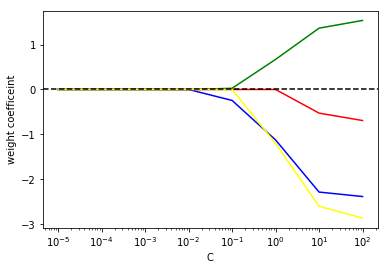

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
colors = ['red','blue','green','yellow']
weights, params = [],[]
for c in [.00001,.0001,.001,.01,.1,1,10,100]:
    lr = LogisticRegression(penalty = 'l1', C = c)
    lr.fit(Xtrain, ytrain)
    weights.append(lr.coef_[1])
    params.append(c)
weights = np.array(weights)    
for column, color in zip(range(weights.shape[1]), colors):
    ax.plot(params, weights[:,column], label = iris.target, color = color)

ax.set_ylabel('weight coefficeint')
ax.set_xlabel('C')
ax.axhline(0, color = 'black', linestyle = '--')    
ax.set_xscale('log') 


We defined that 

$$z = w_1x_1+w_2x_2+....+w_mx_m = \sum_{j=0}^m x_jw_j = w^Tx$$

For simplicity, we can rewrite above equation by bring $\theta$ to left hand side and define a weight-zero as -$\theta$ and $x_0$ as 1. We get - 

In case of logistic regression, let us say that the probability of 'positive event' is $p$. We can now define the **odds ratio** $\frac{p}{1-p}$. Also, we define a **logit function** -

$$ logit(p) = log\frac{p}{1-p}$$

Now what we are actually interested in is predicting the probability that a certain sample belongs to a particular class, which is the inverse form of the logit function. It is also called the logistic function, sometimes simply abbreviated as sigmoid function due to its characteristic S-shape. Also, we'll take this logistic function as our activation function $\phi(z)$.

$$\phi(z) = \frac{1}{1+e^{-z}}$$

Note that, in some literature, $\phi(z)$ is also written as $h_\theta(x)$ and is called **hypothesis function**.

Plot for this sigmoid function will look like below: -

![](images/sigmoid.png)

This sigmoid function (hypothesis function) represents at the same time the estimated probability that y = 1 on input x parameterized by w:

$$\phi(z) = P( y =1| x;w) = 1 - P( y =0| x;w)$$

The output of the sigmoid function is then interpreted as the probability of particular sample belonging to class 1, $\phi(z) = P( y =1| x;w)$ , given its features x parameterized by the weights w. For example, if we compute $\phi(z)$ = 0.8 for a particular flower sample, it means that the chance that this sample is an Iris-Versicolor flower is 80 percent.

The predicted probability can then simply be converted into a binary outcome via a quantizer (unit step function):


$$ \hat{y} = 
\begin{pmatrix}
1 & if \phi(z) \geq .5 \\
0 & otherwise
\end{pmatrix}
\quad
$$

### Cost function for Logistic Regression

Although a possible definition of the cost function could be the mean of the Euclidean distance between the activation function $\phi(z)$ and the actual value y among all the *m* samples in the training set, as long as the activation function is formed with the sigmoid function, this definition **would result in a non-convex cost function**, which means that a local minimum could be easily found before global minimum. In order to ensure the cost function is convex (and therefore ensure convergence to the global minimum), **the cost function is transformed using the logarithm of the sigmoid function**.

For logistic regression, the Cost function is defined as - 

$$ Cost(\phi(z),y) = 
\begin{pmatrix}
-log(\phi(z)) & if y = 1 \\
-log(1-(\phi(z))) & if y =  0
\end{pmatrix}
\quad
$$

which can be written as - 

$$ Cost(\phi(z),y) = (y-1)log(1-\phi(z))-ylog\phi(z)$$

This way the optimization objective function can be defined as the mean of the cost/errors in the training set:

$$J(w) = \frac{1}{m}\sum_{i=1}^m(Cost(\phi(z)^i,y^i))$$

Also, an intuition about how logistic regression works can be get by looking at following illustration - 

![](images/logistic.png)

Compare this illustration of logistic regression to that of perceptron (shown below) where $\phi(z) = z$. 

![](images/perceptron.png)
